In [29]:
import json, os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")

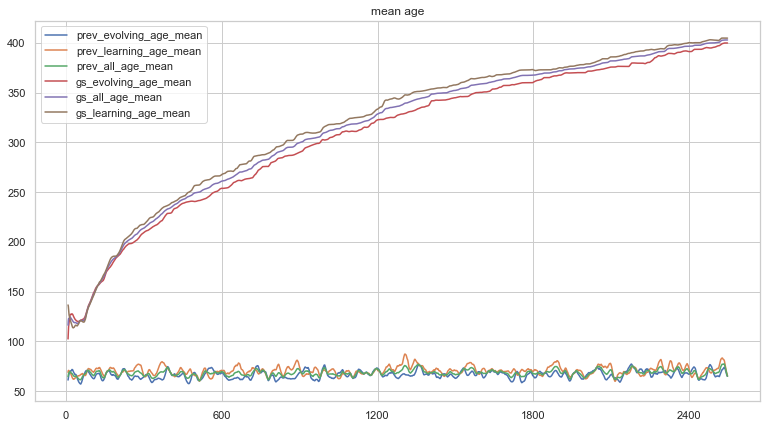

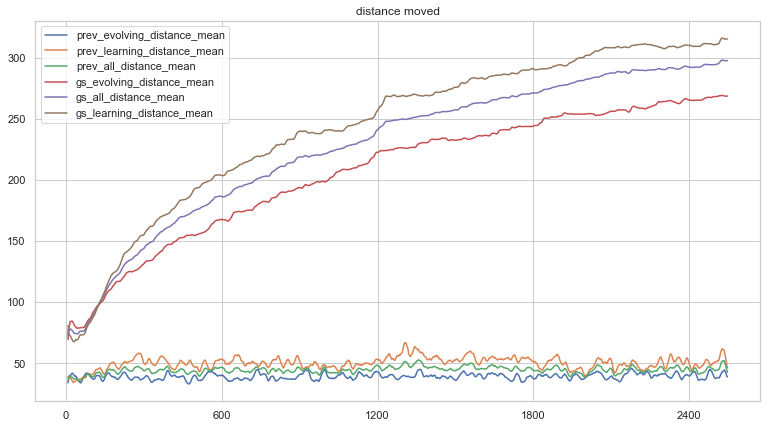

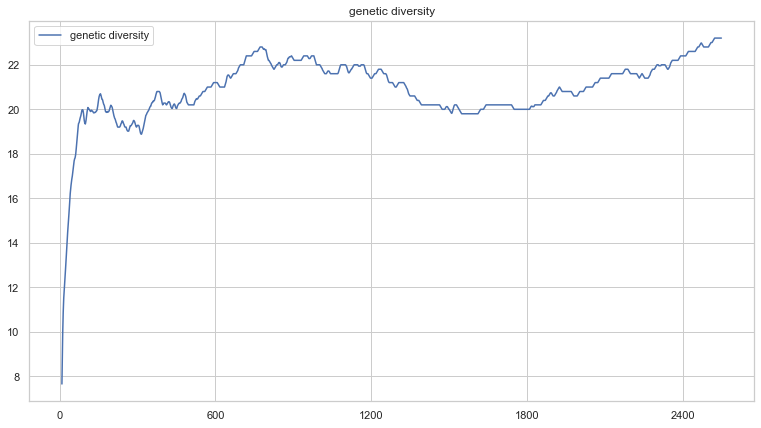

In [30]:
stats = {}
with open("alien_ecology_stats/stats.json", "r") as f:
    stats = json.loads(f.read())

am = [x for x in stats.keys() if "age_mean" in x]
fm = [x for x in stats.keys() if "fitness_mean" in x]
dm = [x for x in stats.keys() if "distance_mean" in x]
lad = [x for x in stats.keys() if "learning_action" in x]
ead = [x for x in stats.keys() if "evolving_action" in x]

show = {
        'mean age': am,
        #'mean fitness': fm,
        'distance moved': dm,
        'genetic diversity': ["genetic diversity"],
       }

for title, group in show.items():
    if len(group) < 1:
        continue
    min_p = min(len(stats[l]) for l in group)
    plot_data = {}
    for label in group:
        plot_data[label] = stats[label][-min_p:]
    data = pd.DataFrame(plot_data)
    fig = plt.figure(figsize=(13,7))
    data = data.rolling(10).mean()
    ax = sns.lineplot(data=data, hue="event", style="event", dashes=False, markers=False, linewidth=1.5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_title(title)
    plt.show()

In [33]:
import pickle
from collections import Counter

with open("alien_ecology_save/genome_store.pkl", "rb") as f:
    genome_store = pickle.load(f)

def gen_printable(gen):
    msg = ""
    for item in gen:
        ch = "Z"
        if int(item) == -1:
            ch = "M"
        elif int(item) == 1:
            ch = "P"
        msg += ch
    return msg
    
unique = []
counts = []
fitness = []
age = []

num_blocks = len(genome_store[0][0])
print("Blocks: " + str(num_blocks))
for index in range(num_blocks):
    unique.append(set())
    counts.append(Counter())
    fitness.append({})
    age.append({})

print("Entries in genome store: " + str(len(genome_store)))
for index, entry in enumerate(genome_store):
    for block in range(len(entry[0])):
        genome = entry[0][block]
        gpr = gen_printable(genome)
        unique[block].add(gpr)
        counts[block][gpr] += 1
        fitness[block][gpr] = entry[1]
        age[block][gpr] = entry[2]
    
for block in range(num_blocks):
    print("Block: " + str(block) + " unique genomes: " + str(len(unique[block])))
    for x, c in counts[block].most_common(10):
        print("count:", c, "age:", age[block][x], "fitness:", fitness[block][x])
        print(x + " (" + str(len(x)) + ")")
    print()

Blocks: 5
Entries in genome store: 116
Block: 0 unique genomes: 9
count: 28 age: 314 fitness: 742.0180326344973
MZZMZMZMMMMPPPPMZPPZMZPZMMMZMPPMPZMP (36)
count: 25 age: 141 fitness: 406.2446641351411
ZMZPPZMZZMPMPPMMZZMZMZMMPZPMZMMPMMPP (36)
count: 22 age: 100 fitness: 307.8865366293288
PPMMZMPZPMZMPPMPZZMZZMMZZPPPPPMZZMMM (36)
count: 21 age: 98 fitness: 298.809508920869
PPPMMZZZMMMMZZZPPMZZMMMZPZPPZZZZMZZM (36)
count: 16 age: 206 fitness: 469.8985222083818
MPPMPPZZMMMPZPZZMMPMZPPMZPMPPZMZPZMM (36)
count: 1 age: 71 fitness: 229.27130694945117
MZZMPPPZZPZMPPMPZMMMPPZZZMPMMPMPPZMZ (36)
count: 1 age: 84 fitness: 278.3481280526648
PMMPMMPZZPPZMPPMPZPMMZPPZPPZZZMPMZPZ (36)
count: 1 age: 138 fitness: 372.4283248937499
ZPPZMPPPMPPMMMMPZPZPZZMMZZMZPPPZMPMP (36)
count: 1 age: 81 fitness: 272.5203187188331
PMMPMZMPMMMMMZMZMMPMPPMZZZMZPZZMMMPZ (36)

Block: 1 unique genomes: 9
count: 28 age: 314 fitness: 742.0180326344973
PMMMZZPZMMZPPMPZMPZMPZPZPMPMMPMMPMMMMMZPPPZPPPZZPM (50)
count: 25 age: 141 f

In [34]:
# Identify if identical genomes exist in genome store
genome_strings = Counter()

for index, entry in enumerate(genome_store):
    l = entry[5]
    a = entry[2]
    full_genome = []
    for block in range(len(entry[0])):
        genome = entry[0][block]
        full_genome.extend(genome)
    genome_str = str(list(full_genome)) + "L:" + str(l) + " A:" + str(a)
    genome_strings[genome_str] += 1
for x, c in genome_strings.most_common():
    print(str(c) + ": " + str(x) + "\n")

1: [1.0, 1.0, -1.0, -1.0, 0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0.0, -1.0, 1.0, 1.0, -1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 0.0, 0.0, -1.0, -1.0, -1.0, 0.0, 1.0, -1.0, -1.0, 1.0, 0.0, -1.0, 1.0, -1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, -1.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 0.0, -1.0, -1.0, 1.0, 1.0, 0.0, 1.0, 1.0, -1.0, -1.0, 1.0, 0.0, 0.0, 1.0, 1.0, -1.0, -1.0, 0.0, 1.0, -1.0, 1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, -1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 1.0, 0.0, -1.0, -1.0, 1.0, 1.0, -1.0, 0.0, 1.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 1.0, 1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 0.0, -1.0, 0.0, 0.0, 1.0, 0.0, -1.0, -1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, -1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 0.0, 0.0, 1.0, -1.0, 0.0, -1.0, 0.0, 1.0, 1.0

In [ ]:
# Display graph of neural network
inter = {}
for x, c in counts[0].most_common(1):
    genome = x
    index = 0
    # Input node connections to hidden layer
    for inpn in range(4):
        for outn in range(4, 12):
            weight = 0
            if genome[index] == "P":
                weight = 1
            elif genome[index] == "M":
                weight = 1
            if weight != 0:
                if inpn not in inter:
                    inter[inpn] = Counter()
                inter[inpn][outn] = weight
            index += 1
    # Hidden nodes to output nodes
    for inpn in range(4, 12):
        for outn in range(13, 17):
            weight = 0
            if genome[index] == "P":
                weight = 1
            elif genome[index] == "M":
                weight = 1
            if weight != 0:
                if inpn not in inter:
                    inter[inpn] = Counter()
                inter[inpn][outn] = weight
            index += 1
    print(inter)
with open("graph.csv", "w") as f:
    f.write("Source,Target,Weight\n")
    for source, targets in inter.items():
        for target, weight in targets.items():
            f.write(str(source)+","+str(target)+","+str(weight)+"\n")